## K-means分类

[sklearn.cluster.KMeans — scikit-learn 1.0.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans.transform)

(150, 4)
[0 3 3 3 0 0 3 0 3 3 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 3 0 0 0 3 3 0
 0 3 0 0 3 3 0 0 3 0 3 0 0 1 1 1 2 1 2 1 3 1 3 3 2 2 2 2 1 2 2 2 2 2 2 2 2
 1 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 3 2 2 2 2 3 2 1 2 1 2 1 1 3 1 1 1 1
 2 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 2 1 1 1 2 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
[[5.1875     3.6375    ]
 [6.85348837 3.1       ]
 [5.90980392 2.73529412]
 [4.76666667 2.89166667]]


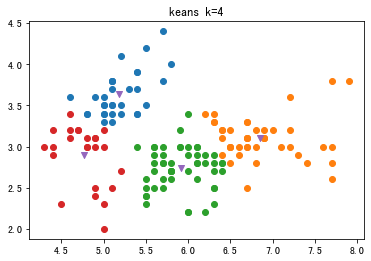

In [79]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

data = load_iris()
print(data.data.shape)

n_clusters = 4 # 将簇的数量设置为3
model = KMeans(n_clusters=n_clusters)
X=data.data[:,:2]
model.fit(X)

print(model.labels_) # 各数据点所属的簇 
print(model.cluster_centers_) # 通过fit()计算得到的重心


for clusterLabel in set(model.labels_):
    plt.scatter(X[np.where(model.labels_==clusterLabel)][:,0], X[np.where(model.labels_==clusterLabel)][:,1])

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker='v')
plt.title(f"keans k={n_clusters}")
plt.show()

In [80]:
import math

X_distance=model.transform(X)
print(X_distance.shape)

def verifyDistance(index):
    print(X[index])
    print(X_distance[index])
    for i in range(3):
        distance = math.sqrt(((X[index][0]-model.cluster_centers_[i][0])**2 + (X[index][1]-model.cluster_centers_[i][1])**2))
        print("verifyDistance",i, distance)
#verifyDistance(0)

def getWCSS():
    WCSS=0
    for index in range(len(model.labels_)):
            cluster= model.labels_[index]
            distance = X_distance[index][cluster]
            #print(index, f'-{cluster}-', distance)
            WCSS+=distance**2
    return WCSS

print("WCSS is", getWCSS(), 'for k=',n_clusters)


(150, 4)
WCSS is 27.990212038304005 for k= 4


## 聚类过程和分类边界

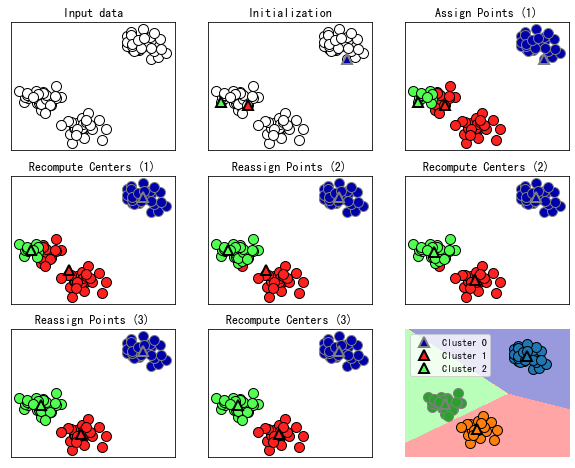

In [38]:
import mglearn

mglearn.plots.plot_kmeans_algorithm()
mglearn.plots.plot_kmeans_boundaries()

## Kmeans 中心点的移动轨迹

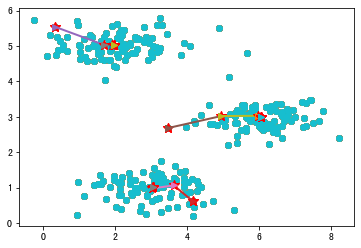

In [82]:
import numpy as np
import imageio
import scipy.io as spio
import matplotlib.pyplot as plt
datafile = '../resource/lawLite19/K-means/data.mat' 


def initCentroids(X,K):
    m = X.shape[0]
    m_arr = np.arange(0,m)
    centroids = np.zeros((K,X.shape[1]))
    np.random.shuffle(m_arr)
    rand_indices = m_arr[:K]
    centroids = X[rand_indices,:]
    return centroids

def calcDistance(X,init_centroids):
    m = X.shape[0]
    K = init_centroids.shape[0]
    dis = np.zeros((m,K))
    idx = np.zeros((m,1))

    for i in range(m):
        for j in range(K):
            dis[i,j] = np.dot((X[i,:]-init_centroids[j,:]).reshape(1,-1),(X[i,:]-init_centroids[j,:]).reshape(-1,1))

    dummy, idx = np.where(dis==np.min(dis,axis=1).reshape(-1,1))
    return idx[0:m]

def calcCentroids(X,idx,K):
    n = X.shape[1]
    centroids = np.zeros((K,n))
    for i in range(K):
        centroids[i,:] = np.mean(X[np.ravel(idx==i),:],axis=0).reshape(1,-1)

    return centroids

def plotProcess(X,centriods,pre_centroids):
    plt.scatter(X[:,0],X[:,1])
    plt.plot(pre_centroids[:,0],pre_centroids[:,1],'r*',markersize=10,linewidth=5)
    plt.plot(centriods[:,0],centriods[:,1],'r*',markersize=10,linewidth=5)
    for j in range(centriods.shape[0]):
        p1 = centriods[j,:]
        p2 = pre_centroids[j,:]
        plt.plot([p1[0],p2[0]],[p1[1],p2[1]],'->',linewidth=2)
    return plt

def KMeans(X,init_centroids,max_iters,plot_process):
    m,n = X.shape
    K = init_centroids.shape[0]
    centriods = init_centroids
    pre_centroids = centriods

    for i in range(max_iters):
        if plot_process:
            ax = plotProcess(X,centriods,pre_centroids)
            pre_centroids = centriods
        idx = calcDistance(X,centriods)
        centriods = calcCentroids(X,idx,K)
    if plot_process:
        ax.show()
    return centriods,idx



def trackCentroids():
    
    data = spio.loadmat(datafile)
    X = data['X']
    K = 3 
    # init_centroids = np.array([[3,3],[0,2],[7,5]])
    init_centroids = initCentroids(X,K)
    max_iters = 10
    KMeans(X,init_centroids,max_iters,True)

trackCentroids()


##  kmeans可以应用于图像压缩

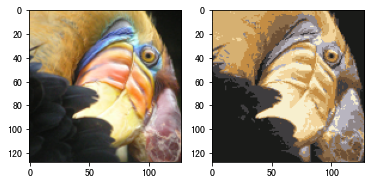

In [83]:
datafile = '../resource/lawLite19/K-means/bird.png' 

def imageCompression():
    img_data = imageio.imread(datafile)
    img_data = img_data/255.0
    img_size =img_data.shape
    X = img_data.reshape(img_size[0]*img_size[1],3)

    K = 10
    max_iters = 10
    init_centroids = initCentroids(X,K)
    centroids,idx = KMeans(X,init_centroids,max_iters,False)
    idx = calcDistance(X,centroids)
    X_recovered = centroids[idx,:]
    X_recovered = X_recovered.reshape(img_size[0],img_size[1],3)

    plt.subplot(1,2,1)
    plt.imshow(img_data)
    plt.subplot(1,2,2)
    plt.imshow(X_recovered)
    plt.show()

imageCompression()